# Analysis for salmon trap data in the Dungenesss River from 2008
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2008, the counts for wild and hatchery fish are separate.


In [100]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime

In [101]:
year = "2008"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [1,2,3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
print(columns)

#flatten dataframe and choose column names
list_names = []
for col in df_year.columns.values:
    
    check = str(col[2])
    if check[0].isdigit():
        if (str(col[0]) == 'Chinook1') & (str(col[1]) == 'Hatchery'):
            list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
        elif (str(col[0]) == 'Trout Parr'):
            list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
        else:
            list_names.append(str(col[0]) + '_' + str(col[1]))
    elif (str(col[2]) == "Unmark")|(str(col[2]) == "Unmarked"):
        list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
    else:
        list_names.append(str(col[2]))

df_year.columns = list_names
df_year = df_year.iloc[:-1] #remove last line which has no data



[('Trapping Intervals', 'Trapping dates and times ', 'Down'), ('Trapping Intervals', 'Trapping dates and times ', 'TimeD'), ('Trapping Intervals', 'Trapping dates and times ', 'Up'), ('Trapping Intervals', 'Trapping dates and times ', 'TimeU'), ('Trapping Intervals', 'Hours Fished', 'In'), ('Trapping Intervals', 'Hours Fished', 'Out'), ('Chinook0', 'Total', 10), ('Chinook0', 'Hatchery', '10\\30'), ('Chinook0', 'Wild', '10\\00'), ('Chinook1', 'Total', 11), ('Chinook1', 'Hatchery', '11\\12'), ('Chinook1', 'Hatchery', '11\\30'), ('Chinook1', 'Wild', '11\\00'), ('Coho1', 'Total', 41), ('Coho1', 'Hatchery', '41\\13'), ('Coho1', 'Wild', '41\\08'), ('Coho1', 'Wild', 'Unmark'), ('Chum', 'Wild', 20), ('Coho Fry', 'Wild', 40), ('Pink', 'Total', 30), ('Pink', 'Hatchery', '30\\13'), ('Pink', 'Wild', 'Unmarked'), ('Steelhead Smolts', 'Total', 71), ('Steelhead Smolts', 'Hatchery', '71\\13'), ('Steelhead Smolts', 'Wild', '71\\08'), ('Steelhead Smolts', 'Wild', 'Unmark'), ('Cutthroat', 'Wild', 61), ('

In [102]:
#rename columns to be consistent with previous years
df_year = df_year.rename(columns={'Down': "Date",
                        'TimeD': "Down_time",
                        'Up': "Up_date",
                        'TimeU': "Up_time"})
#make columns that are consistent with previous years
df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"].astype(str))
df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"].astype(str))
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(


,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery,Chinook0_Wild,Chinook1_Total,Chinook1_Hatchery_11\12,Chinook1_Hatchery_11\30,Chinook1_Wild,Coho1_Total,Coho1_Hatchery,Coho1_Wild,Coho1_Wild_Unmark,Chum_Wild,Coho Fry_Wild,Pink_Total,Pink_Hatchery,Pink_Wild_Unmarked,Steelhead Smolts_Total,Steelhead Smolts_Hatchery,Steelhead Smolts_Wild,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild,Cutthroat_Wild,Trout Parr_Wild_65,Trout Parr_Wild_70,Trout Parr_Wild_60,Dolly\Bull_Wild,Up,Down,midpoint
0,2008-02-13,15:30:00,2008-02-14,07:50:00,16.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-14 07:50:00,2008-02-13 15:30:00,2008-02-13 23:40:00
1,2008-02-14,07:50:00,2008-02-14,17:15:00,9.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2008-02-14 17:15:00,2008-02-14 07:50:00,2008-02-14 12:32:30
2,2008-02-14,17:15:00,2008-02-15,08:33:00,15.300000,0.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-15 08:33:00,2008-02-14 17:15:00,2008-02-15 00:54:00
3,2008-02-15,08:33:00,2008-02-15,17:22:00,8.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-15 17:22:00,2008-02-15 08:33:00,2008-02-15 12:57:30
4,2008-02-15,17:22:00,2008-02-16,08:27:00,15.083333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2008-02-16 08:27:00,2008-02-15 17:22:00,2008-02-16 00:54:30
5,2008-02-16,08:27:00,2008-02-16,16:44:00,8.283333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-16 16:44:00,2008-02-16 08:27:00,2008-02-16 12:35:30
6,2008-02-16,16:44:00,2008-02-17,08:40:00,15.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-17 08:40:00,2008-02-16 16:44:00,2008-02-17 00:42:00
7,2008-02-17,08:40:00,2008-02-17,17:38:00,8.966667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-17 17:38:00,2008-02-17 08:40:00,2008-02-17 13:09:00
8,2008-02-17,17:38:00,2008-02-18,08:47:00,15.150000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2008-02-18 08:47:00,2008-02-17 17:38:00,2008-02-18 01:12:30
9,2008-02-18,08:47:00,2008-02-18,16:38:00,7.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-18 16:38:00,2008-02-18 08:47:00,2008-02-18 12:42:30


In [103]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()
text = text[522:-72]
text_flow = text_flow[519:-182]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])

# df = df.iloc[:-2] #removing last two rows that do not contain data
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))
# print(df_year_temp)
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery,Chinook0_Wild,Chinook1_Total,Chinook1_Hatchery_11\12,Chinook1_Hatchery_11\30,Chinook1_Wild,Coho1_Total,Coho1_Hatchery,Coho1_Wild,Coho1_Wild_Unmark,Chum_Wild,Coho Fry_Wild,Pink_Total,Pink_Hatchery,Pink_Wild_Unmarked,Steelhead Smolts_Total,Steelhead Smolts_Hatchery,Steelhead Smolts_Wild,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild,Cutthroat_Wild,Trout Parr_Wild_65,Trout Parr_Wild_70,Trout Parr_Wild_60,Dolly\Bull_Wild,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2008-02-13,15:30:00,2008-02-14,07:50:00,16.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-14 07:50:00,2008-02-13 15:30:00,2008-02-13 23:40:00,02/13/2008,23:30,3.1,140.0,02/13/2008,23:30,149.0,2
1,2008-02-14,07:50:00,2008-02-14,17:15:00,9.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2008-02-14 17:15:00,2008-02-14 07:50:00,2008-02-14 12:32:30,02/14/2008,12:30,3.4,140.0,02/14/2008,12:30,143.0,2
2,2008-02-14,17:15:00,2008-02-15,08:33:00,15.300000,0.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-15 08:33:00,2008-02-14 17:15:00,2008-02-15 00:54:00,02/15/2008,00:45,3.6,140.0,02/15/2008,00:45,141.0,2
3,2008-02-15,08:33:00,2008-02-15,17:22:00,8.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-15 17:22:00,2008-02-15 08:33:00,2008-02-15 12:57:30,02/15/2008,12:45,4.0,140.0,02/15/2008,12:45,137.0,2
4,2008-02-15,17:22:00,2008-02-16,08:27:00,15.083333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2008-02-16 08:27:00,2008-02-15 17:22:00,2008-02-16 00:54:30,02/16/2008,00:45,4.0,140.0,02/16/2008,00:45,139.0,2
5,2008-02-16,08:27:00,2008-02-16,16:44:00,8.283333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-16 16:44:00,2008-02-16 08:27:00,2008-02-16 12:35:30,02/16/2008,12:30,4.6,140.0,02/16/2008,12:30,135.0,2
6,2008-02-16,16:44:00,2008-02-17,08:40:00,15.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-17 08:40:00,2008-02-16 16:44:00,2008-02-17 00:42:00,02/17/2008,00:30,3.6,140.0,02/17/2008,00:30,133.0,2
7,2008-02-17,08:40:00,2008-02-17,17:38:00,8.966667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-17 17:38:00,2008-02-17 08:40:00,2008-02-17 13:09:00,02/17/2008,13:00,4.5,140.0,02/17/2008,13:00,129.0,2
8,2008-02-17,17:38:00,2008-02-18,08:47:00,15.150000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2008-02-18 08:47:00,2008-02-17 17:38:00,2008-02-18 01:12:30,02/18/2008,01:00,3.0,140.0,02/18/2008,01:00,128.0,2
9,2008-02-18,08:47:00,2008-02-18,16:38:00,7.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-02-18 16:38:00,2008-02-18 08:47:00,2008-02-18 12:42:30,02/18/2008,12:30,3.6,140.0,02/18/2008,12:30,130.0,2


In [104]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery':'Chinook0_Hat',
                                       "Chinook1_Hatchery_11\\12":'Chinook1_Hat',
                                       "Chinook1_Hatchery_11\\30":'Chinook1_Hat1',                           
                                       'Coho1_Hatchery':'Coho1_Hat',
                                       'Coho1_Wild_Unmark':'Coho1_Wild1', 
                                       'Steelhead Smolts_Total':'Steelhead1_Total',
                                       'Steelhead Smolts_Wild':'Steelhead1_Wild',
                                       'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild1',
                                       'Trout Parr_Wild_70':'Trout Parr_Wild_Steelhead',
                                       'Steelhead Smolts_Hatchery':'Steelhead1_Hat'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                       'Out':'sum',
                                       'Chinook0_Total':'sum',
                                       'Chinook0_Hat':'sum',
                                       'Chinook0_Wild':'sum',                            
                                       'Chinook1_Total':'sum',
                                       'Chinook1_Hat':'sum',
                                       'Chinook1_Hat1':'sum', 
                                       'Chinook1_Wild':'sum',  
                                       'Coho1_Total':'sum',
                                       'Coho1_Wild':'sum',
                                       'Coho1_Wild1':'sum',
                                       'Coho1_Hat':'sum',
                                       'Steelhead1_Total':'sum',
                                       'Steelhead1_Wild':'sum',
                                       'Steelhead1_Wild1':'sum',
                                       'Steelhead1_Hat':'sum', 
                                       'Trout Parr_Wild_Steelhead':'sum',
                                       'temp':'mean',
                                       'flow':'mean'})
# groupedby_dates_year = groupedby_dates_year[groupedby_dates_year['Out'] == 0]
# groupedby_dates_year.fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Hat1,Chinook1_Wild,Coho1_Total,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Hat,Trout Parr_Wild_Steelhead,temp,flow
Date,,,,,,,,,,,,,,,,,,,,
2008-02-13,16.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10,149.000000
2008-02-14,24.716667,0.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.50,142.000000
2008-02-15,23.900000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.00,138.000000
2008-02-16,24.216667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.10,134.000000
2008-02-17,24.116667,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.75,128.500000
2008-02-18,23.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,128.000000
2008-02-19,23.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.75,136.000000
2008-02-20,24.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,146.500000
2008-02-21,20.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.70,146.000000


In [72]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = groupedby_dates_year['Chinook0_Hat']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (groupedby_dates_year['Chinook1_Hat']+groupedby_dates_year['Chinook1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = groupedby_dates_year['Coho1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = groupedby_dates_year['Steelhead1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']




In [73]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

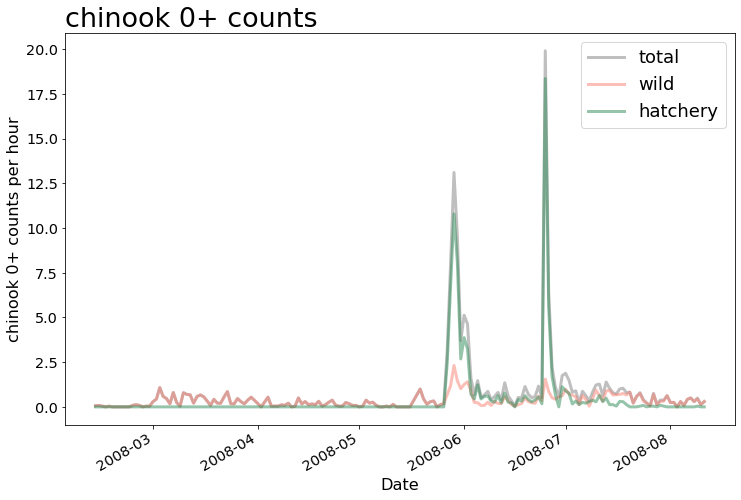

In [74]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

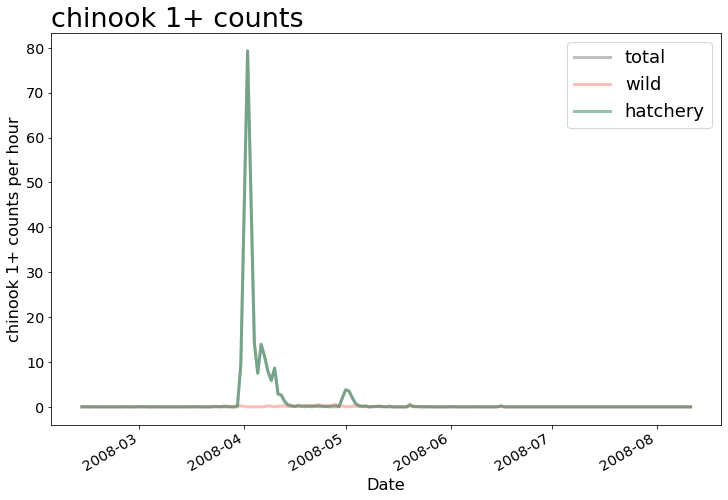

In [76]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

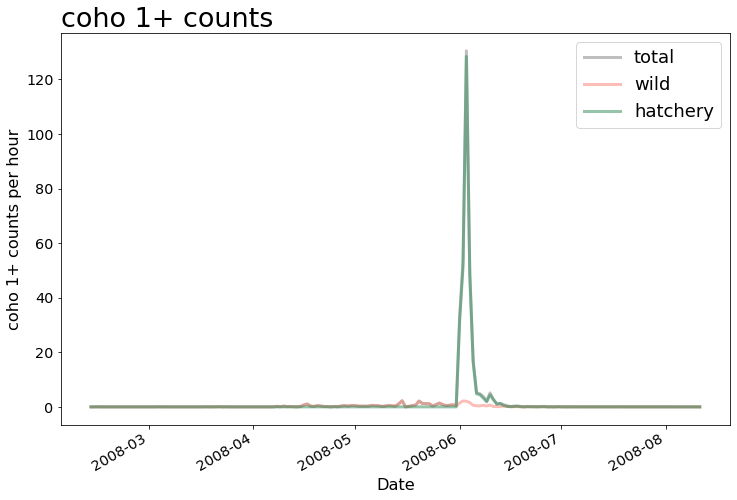

In [77]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

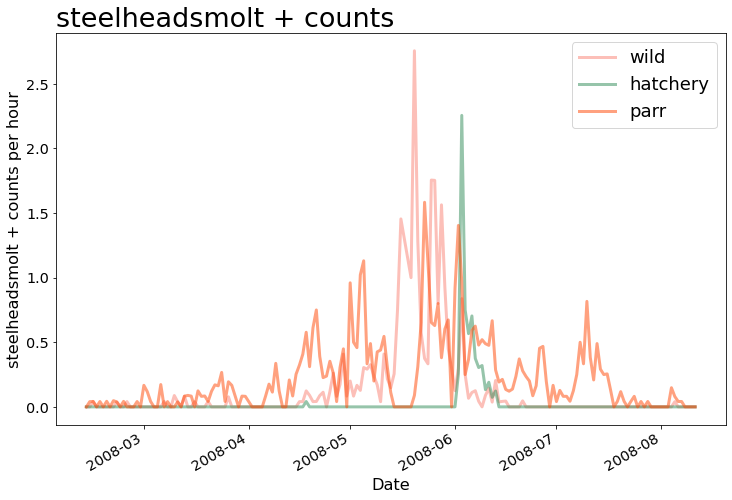

In [80]:
#steelhead
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["wild","hatchery","parr"])

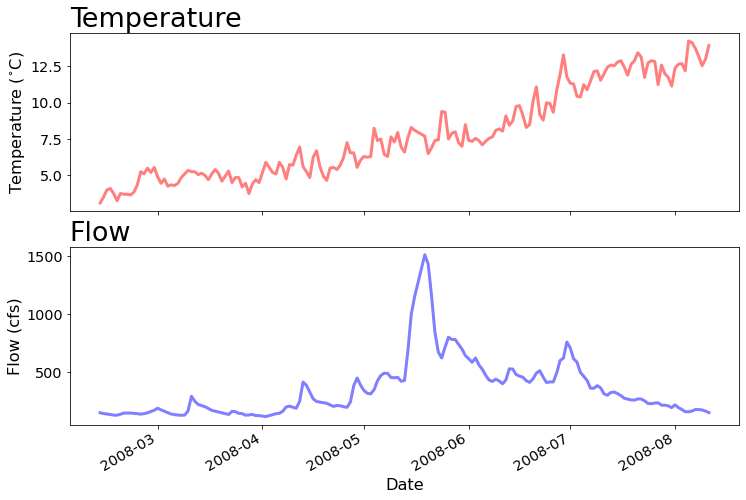

In [81]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [84]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2008_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2008_dungeness_all.csv")
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2008_dungeness_time.csv")  


In [105]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                    'Chinook0_Wild',
                    'Chinook1_Hat',
                    'Chinook1_Hat1',
                    'Chinook1_Wild',
                    'Coho1_Wild',
                    'Coho1_Wild1',
                    'Coho1_Hat',
                    'Steelhead1_Hat',
                    'Steelhead1_Wild',
                    'Steelhead1_Wild1',
                    'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat']/groupedby_time_year_subset['Chinook0_Hat'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()

groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat']+groupedby_time_year_subset['Chinook1_Hat1'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()


groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()

groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat']/groupedby_time_year_subset['Coho1_Hat'].sum()

groupedby_time_year_subset['Coho1_Wild'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild']/groupedby_time_year_subset['Coho1_Wild'].sum()

groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Hat1,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.723248,0.346844,0.000000,0.009854,0.063062,0.218748,0.179334,0.120213,0.007883,0.013795,0.224660,0.206924,0.089953,0.061607,0.009854,0.000431,0.264363,0.000267,0.021181,0.238455,0.052652,0.000876,0.043089
01:00:00,1.125221,0.549996,0.031116,1.115970,0.074847,0.314524,0.301068,1.700446,0.009251,0.010092,0.167353,0.453284,0.139947,0.097691,1.147086,0.050120,0.313763,0.003779,0.030455,0.177445,0.039181,0.001029,0.094391
02:00:00,0.173246,0.475278,0.032196,0.967420,0.076658,0.305098,0.272901,0.516673,0.042928,0.015332,0.122652,0.308164,0.021547,0.084419,0.999617,0.043676,0.321355,0.001148,0.029542,0.137984,0.030468,0.004773,0.064171
03:00:00,0.666667,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407407,0.082915,0.138149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084838
04:00:00,2.222222,0.296296,0.000000,0.000000,0.000000,1.037037,1.037037,21.925926,0.888889,0.000000,0.000000,0.592593,0.276385,0.052628,0.000000,0.000000,0.000000,0.048723,0.100416,0.000000,0.000000,0.098829,0.123400
07:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615385,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001367,0.000000,0.153846,0.033970,0.000000,0.000000
11:00:00,0.274286,0.045714,0.000000,0.000000,0.000000,0.045714,0.045714,0.000000,0.000000,0.000000,0.022857,0.000000,0.034114,0.008120,0.000000,0.000000,0.000000,0.000000,0.004426,0.022857,0.005047,0.000000,0.000000
12:00:00,0.014244,0.167369,0.000000,0.028488,0.000000,0.007122,0.007122,0.024927,0.003561,0.000000,0.003561,0.049855,0.001772,0.029728,0.028488,0.001245,0.000000,0.000055,0.000690,0.003561,0.000786,0.000396,0.010382
13:00:00,0.046945,0.171348,0.000000,0.026993,0.004694,0.021125,0.018778,0.084500,0.000000,0.000000,0.004694,0.051639,0.005839,0.030435,0.026993,0.001179,0.019680,0.000188,0.002046,0.004694,0.001037,0.000000,0.010753


Text(0.0, 1.0, 'Proportion of Chinook 0+')

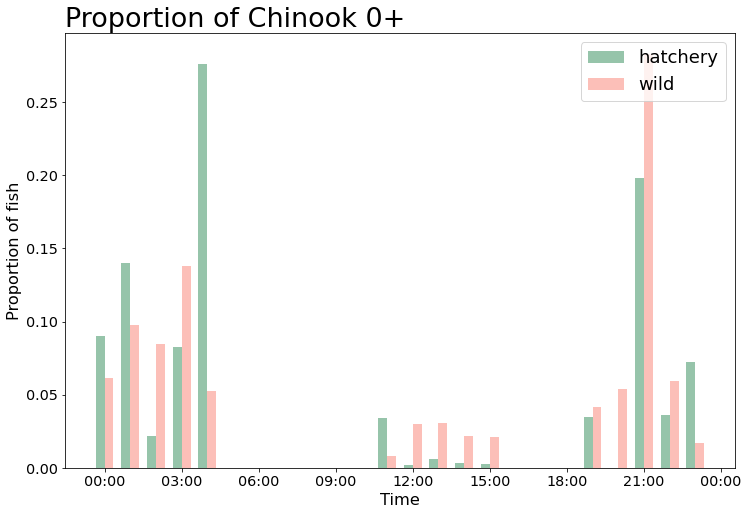

In [90]:
import datetime
import matplotlib.dates as mdates
my_day = datetime.date(2014, 7, 15)
x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
width_bar=(x_dt[1]-x_dt[0])*0.35
x_dt1 = [(t - (width_bar/2)) for t in x_dt]
x_dt2 = [(t + (width_bar/2)) for t in x_dt]

#bar plot Chinook0

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Chinook0_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Chinook0_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Chinook 0+', loc='left', fontsize = fs*1.5)

Text(0.0, 1.0, 'Proportion of Chinook 1+')

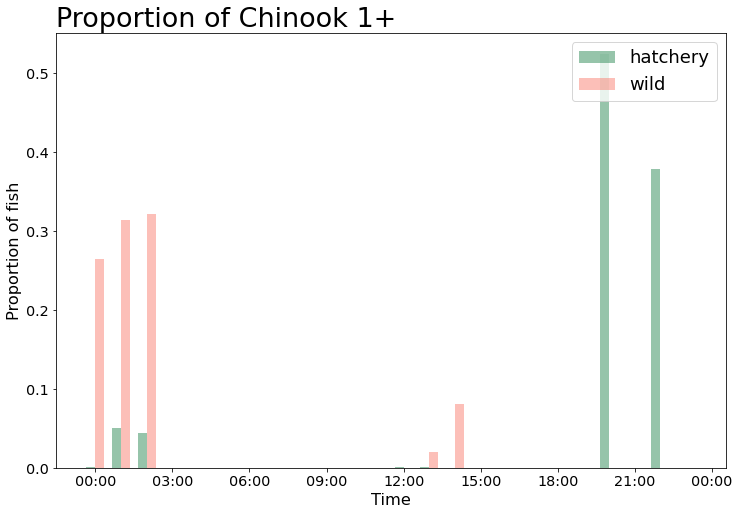

In [93]:
#bar plot Chinook1

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Chinook1_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Chinook1_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Chinook 1+', loc='left', fontsize = fs*1.5)

Text(0.0, 1.0, 'Proportion of Coho 1+')

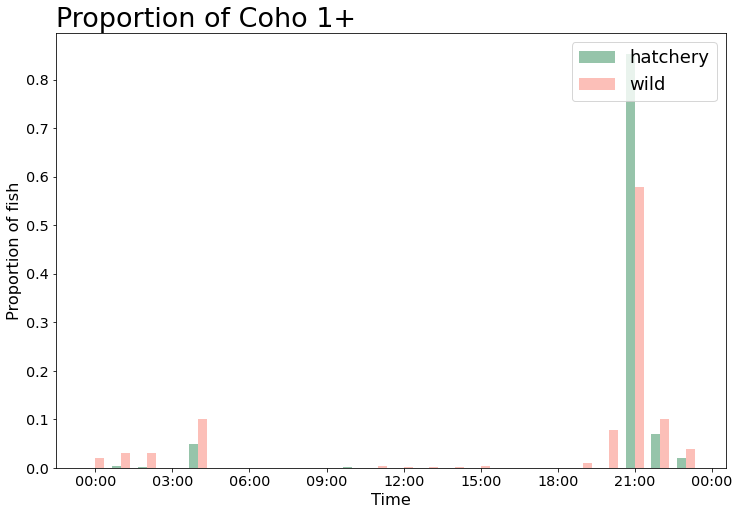

In [94]:
#bar plot Coho1

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Coho1_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Coho1_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Coho 1+', loc='left', fontsize = fs*1.5)

Text(0.0, 1.0, 'Proportion of Steelhead')

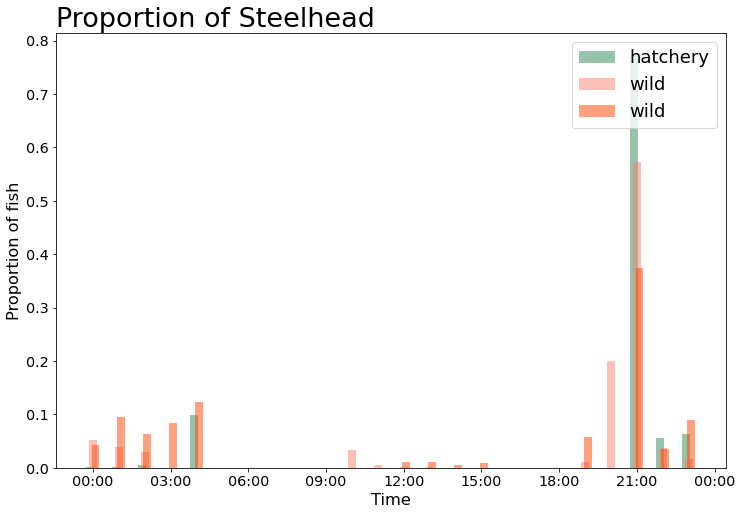

In [99]:
#bar plot Steelhead

width_bar=(x_dt[1]-x_dt[0])*0.3
x_dt1 = [(t - (width_bar/3)) for t in x_dt]
x_dt2 = [(t) for t in x_dt]
x_dt3 = [(t + (width_bar/3)) for t in x_dt]

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
    label = 'wild', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
    label = 'wild', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)

plt.legend(fontsize=fs, loc='upper right', title = '')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)

In [106]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2008_dungeness_time.csv")  


In [4]:
import pandas as pd
year = "2008"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                    'Chinook0_Wild',
                    'Chinook1_Hat',
                    'Chinook1_Hat1',
                    'Chinook1_Wild',
                    'Coho1_Wild',
                    'Coho1_Wild1',
                    'Coho1_Hat',
                    'Steelhead1_Hat',
                    'Steelhead1_Wild',
                    'Steelhead1_Wild1',
                    'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat']/groupedby_time_year_subset['Chinook0_Hat'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()

groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat']+groupedby_time_year_subset['Chinook1_Hat1'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()


groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()

groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat']/groupedby_time_year_subset['Coho1_Hat'].sum()

groupedby_time_year_subset['Coho1_Wild'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild']/groupedby_time_year_subset['Coho1_Wild'].sum()

groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Hat1,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.768996,0.483167,0.024096,0.815527,0.071042,0.287075,0.263395,1.066873,0.020357,0.012048,0.163272,0.357286,0.607121,0.539227,0.839623,0.221732,0.91162,0.03637,0.267435,0.175320,0.383576,0.029041,0.465626
08:00:00,0.041324,0.153400,0.000000,0.021288,0.006887,0.016905,0.015027,0.065117,0.000626,0.000000,0.004383,0.043202,0.032625,0.171198,0.021288,0.005622,0.08838,0.00222,0.015749,0.004383,0.009589,0.000893,0.056303
16:00:00,0.456308,0.259469,0.008947,2.916791,0.000000,0.769460,0.626305,28.201610,0.679988,0.008947,0.268416,0.366836,0.360254,0.289574,2.925738,0.772646,0.00000,0.96141,0.716817,0.277364,0.606835,0.970066,0.478071


In [5]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2008_dungeness_time_daylight.csv")  
